In [27]:
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('Loc teht2.csv')
data = pd.read_csv('Loc teht2.csv',decimal = ',', delimiter = ';') 
data.head()

,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites
0,1.093885,65.082798,25.402334,7.779274,25.281334,0.047898,348.643011,0.000695,14.042148,24.264956,-1.0
1,2.093868,65.082795,25.402347,7.721355,25.223413,0.234933,110.103951,0.002186,13.965798,21.770774,-1.0
2,3.093852,65.082785,25.402368,7.886724,25.388774,0.582824,131.309089,0.003713,12.733522,19.082085,-1.0
3,4.093837,65.082782,25.402400,8.061913,25.563957,0.950398,112.560549,0.005633,12.485092,19.381600,-1.0
4,5.093821,65.082774,25.402437,8.329406,25.831442,0.950398,108.032197,0.007575,12.090803,19.598629,-1.0


In [17]:
import folium 
location_frame = data[['Latitude (°)','Longitude (°)']]
location_list = location_frame.values.tolist() 
ave_lat = np.mean(location_list,axis = 0)[0]
ave_lon = np.mean(location_list,axis = 0)[1]
my_map = folium.Map(location=[ave_lat, ave_lon], zoom_start=14)

folium.PolyLine(location_list, color="red", weight=2.5, opacity=1).add_to(my_map)

my_map.save("Teht2map.html")

In [18]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points on the earth (specified in decimal degrees)
    """
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    
    dlon = lon2 - lon1
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 
    return c * r 

In [49]:
lat = data['Latitude (°)'] 
lon = data['Longitude (°)'] 
data['dist'] = np.zeros(lat.shape[0]) 
data['time_diff'] = np.zeros(lat.shape[0]) 

for i in range(lat.shape[0]-1): 
    data.loc[i, 'dist'] = haversine(lon[i], lat[i],lon[i+1], lat[i+1])*1000 
    data.loc[i, 'time_diff'] = data['Time (s)'][i+1] - data['Time (s)'][i] 
    
data.loc[0, 'dist'] = 0
data['velocity'] = data['dist']/data['time_diff']
data.head()

,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites,dist,time_diff,velocity
0,1.093885,65.082798,25.402334,7.779274,25.281334,0.047898,348.643011,0.000695,14.042148,24.264956,-1.0,0.000000,0.999983,0.000000
1,2.093868,65.082795,25.402347,7.721355,25.223413,0.234933,110.103951,0.002186,13.965798,21.770774,-1.0,1.491352,0.999984,1.491376
2,3.093852,65.082785,25.402368,7.886724,25.388774,0.582824,131.309089,0.003713,12.733522,19.082085,-1.0,1.527007,0.999985,1.527030
3,4.093837,65.082782,25.402400,8.061913,25.563957,0.950398,112.560549,0.005633,12.485092,19.381600,-1.0,1.920235,0.999984,1.920266
4,5.093821,65.082774,25.402437,8.329406,25.831442,0.950398,108.032197,0.007575,12.090803,19.598629,-1.0,1.942021,0.949985,2.044265


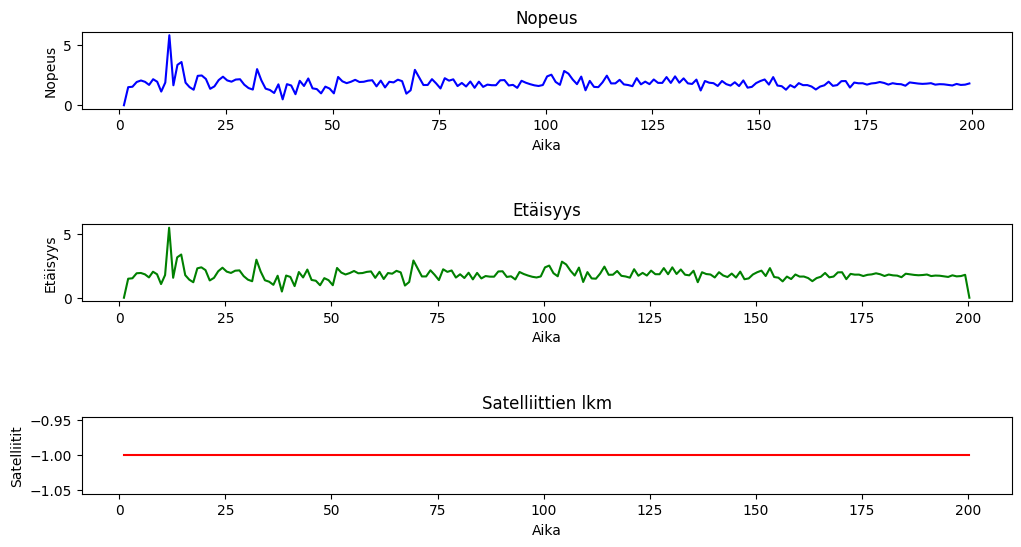

In [51]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(data['Time (s)'], data['velocity'] , color='blue')
plt.xlabel('Aika')
plt.ylabel('Nopeus')
plt.title('Nopeus')

plt.subplot(3, 1, 2)
plt.plot(data['Time (s)'], data['dist'], color='green')
plt.xlabel('Aika')
plt.ylabel('Etäisyys')
plt.title('Etäisyys')

plt.subplot(3, 1, 3)
plt.plot(data['Time (s)'], data['Satellites'] , color='red')
plt.xlabel('Aika')
plt.ylabel('Satelliitit')
plt.title('Satelliittien lkm')

plt.subplots_adjust(hspace=1.5)
plt.show()